In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.linalg import eig
from numpy.linalg import inv
from numpy import diag
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
def calc_w_v(matrix):
    w,v=eig(matrix)
    return w, v
 

In [ ]:
two_by_two = calc_w_v(np.array([[0, -2], [1, -3]]))
print(f"Eigenvalues: {two_by_two[0]}")
print(f"Eigenvectors: {two_by_two[1]}")

In [ ]:
three_by_three = calc_w_v(np.array([[2, 2, 4], [1, 3, 5], [2, 3, 4]]))
print(f"Eigenvalues: {three_by_three[0]}")
print(f"Eigenvectors: {three_by_three[1]}")

In [ ]:
def reconstruct_matrix(vectors, values):
    inverse_vectors = inv(vectors)
    diagonal_matrix = diag(values)
    diagonal_matrix = vectors.dot(diagonal_matrix).dot(inverse_vectors)
    return diagonal_matrix

In [ ]:
print(reconstruct_matrix(two_by_two[1], two_by_two[0]))

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
v = np.array([2 ,  1])
v1 = np.array([2 ,  3])
v1_proj = (np.dot(v1, v) / np.dot(v, v)) * v
scale_factor = 0.5
ax.quiver(0, 0, v[ 0], v[1 ], color='r', angles='xy', scale_units='xy', scale=1, label="v")
ax.quiver(0, 0, v1[ 0], v1[1 ], color='g', angles='xy', scale_units='xy', scale=1, label="v1")
ax.quiver(0, 0, v1_proj[ 0], v1_proj[1 ], color='b', angles='xy', scale_units='xy', scale=1, label="v1 Projection")
ax.set_xlim([-8,  8])
ax.set_ylim([-8,  8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Vector Plot')
plt.grid()
leg = plt.legend(loc= 'upper left')
plt.show()
    

   


In [ ]:
dataset = load_digits()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
x = df 
y = dataset.target  
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca_2 = PCA(n_components=2)
x_pca_2 = pca_2.fit_transform(x_scaled)
plt.scatter(x_pca_2[:, 0], x_pca_2[:, 1], c=dataset.target, cmap="Paired")
plt.colorbar()

In [ ]:
dataset = load_digits()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
x = df 
y = dataset.target  
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca_3 = PCA(n_components=3)
x_pca_3 = pca_3.fit_transform(x_scaled)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pca_3[:,0], x_pca_3[:,1], x_pca_3[:,2], c=dataset.target, cmap="Paired")
plt.show()

In [ ]:
img = cv.cvtColor(cv.imread('number_zoomed.png'), cv.COLOR_BGR2RGB)

In [ ]:
plt.imshow(img)

### Work with 3D image

Goal: Load a random 3D image and compress it by appling PCA

In [13]:
# Step - 1 Load the image and convert the BGR scheme to RGB
# imgread - reads the image
# cvtColor - converts BGR to RGB
file_name = 'terry-vlisidis-RflgrtzU3Cw-unsplash.jpg'
image_3d = cv.cvtColor(cv.imread(file_name), cv.COLOR_BGR2RGB)

In [14]:
# Step - 2 Check and comment on the shape
# image_3d.shape - tuple with 3 elements - rows, columns and channels (RGB). The first and second elements
# represent the size of the image in pixels. We will treat this tuple as a dataset
image_3d.shape

(854, 1280, 3)

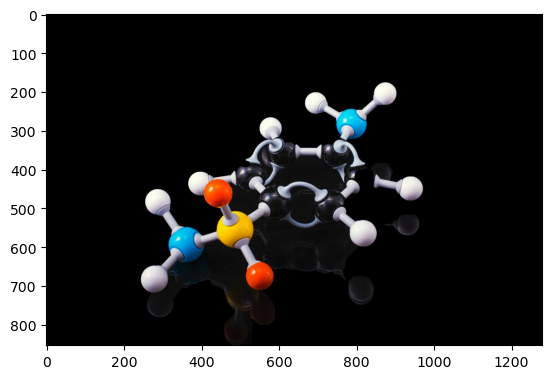

In [25]:
# Step - 3 We can check the actual image
plt.imshow(image_3d)

In [16]:
# Step - 4 Split and normalize the channels 
# The RGB will be compressed separately and them combined in the end so that we can see the quality of the
# compressed image and decide how many principal components will be need to achieve a satisfactory result.

red, green, blue =  cv.split(image_3d)
red, green, blue = red / 255, green / 255, blue / 255

# We can also check the individual channels 
# plt.imshow(red)
# plt.imshow(green)
# plt.imshow(blue)

In [17]:
# Step - 5 apply PCA to the channels separately

number_of_components = 100

pca_red = PCA(n_components=number_of_components)
reduced_red = pca_red.fit_transform(red)
# reduced_red.shape 

pca_green = PCA(n_components=number_of_components)
reduced_green = pca_green.fit_transform(green)
# reduced_green.shape

pca_blue = PCA(n_components=number_of_components)
reduced_blue = pca_blue.fit_transform(blue)
# reduced_green.shape

In [18]:
# Step - 6 combine the channels
combined_channels = np.array([reduced_red, reduced_green, reduced_blue])
combined_channels.shapea

(3, 854, 100)

In [19]:
# Step - 7 reconstruct the channels

reconstructed_red = pca_red.inverse_transform(reduced_red)
reconstructed_green = pca_green.inverse_transform(reduced_green)
reconstructed_blue = pca_blue.inverse_transform(reduced_blue)
# reconstructed_red.shape
# reconstructed_green.shapea
# reconstructed_blue.shape

In [20]:
# Step - 8 - reconstruct the image
reconstructed_image = (cv.merge((reconstructed_red, reconstructed_green, reconstructed_blue)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


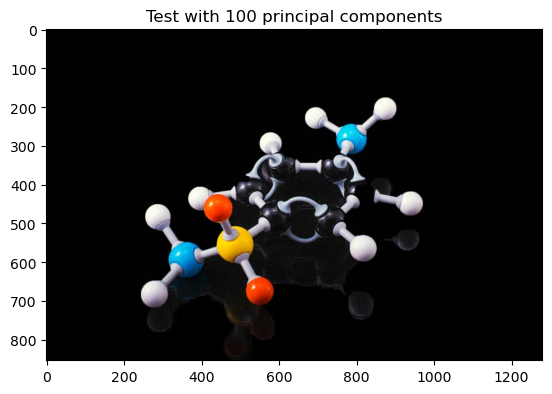

In [29]:
# Step - 9 - display the reconstructed image
plt.imshow(reconstructed_image)
plt.title("Test with 100 principal components")
plt.show()

### Convert the entire flow to sequence of functions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


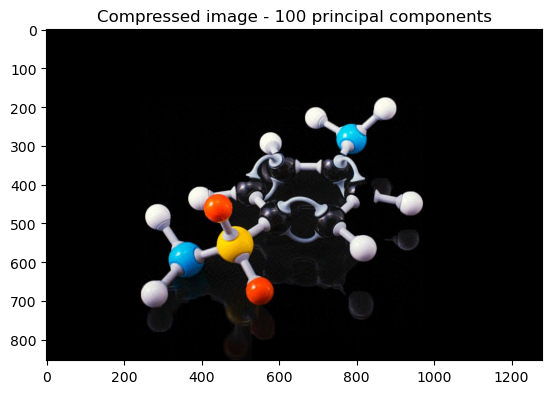

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


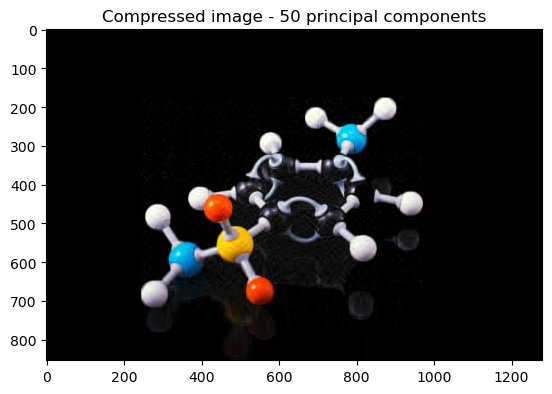

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


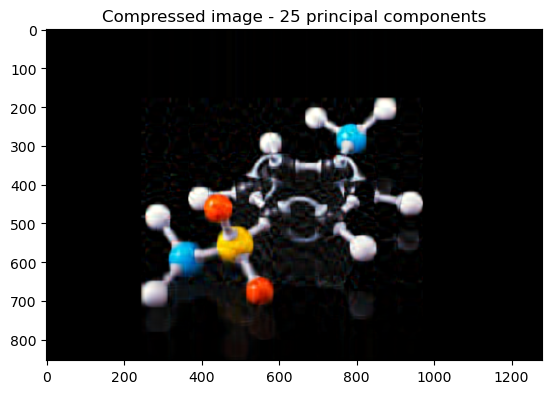

In [35]:
def reconstruct_image(reconstructed_red, reconstructed_green, reconstructed_blue):
    
    return (cv.merge((reconstructed_red, reconstructed_green, reconstructed_blue)))


def reconstruct_channel(pca, reduced_channel):
    
    return pca.inverse_transform(reduced_channel)


def apply_pca(components_num, norm_red, norm_green, norm_blue):
    pca_red = PCA(n_components=components_num)
    reduced_red = pca_red.fit_transform(norm_red)
    reconstructed_red = reconstruct_channel(pca_red, reduced_red)
    
    pca_green = PCA(n_components=components_num)
    reduced_green = pca_green.fit_transform(norm_green)
    reconstructed_green = reconstruct_channel(pca_green, reduced_green)
    
    pca_blue = PCA(n_components=components_num)
    reduced_blue = pca_blue.fit_transform(norm_blue)
    reconstructed_blue = reconstruct_channel(pca_blue, reduced_blue)
    
    return reconstruct_image(reconstructed_red, reconstructed_green, reconstructed_blue)



def split_rgb(image):
    red, green, blue =  cv.split(image)
    red, green, blue = red / 255, green / 255, blue / 255
    
    return red, green, blue


file_name = 'terry-vlisidis-RflgrtzU3Cw-unsplash.jpg'
image_3d = cv.cvtColor(cv.imread(file_name), cv.COLOR_BGR2RGB)

norm_red, norm_green, norm_blue = split_rgb(image_3d)

for components in [100, 50, 25]:
    reconstructed_image = apply_pca(components, norm_red, norm_green, norm_blue)
    plt.imshow(reconstructed_image)
    plt.title(f"Compressed image - {components} principal components")
    plt.show()